In [85]:
try: 
    import seaborn as sns
except:
    %pip install seaborn
    import seaborn as sns
try:
    import pymc as pm # For MCMC
except:
    %pip install pymc
    import pymc as pm
try:
    import arviz as az # For MCMC package
except:
    %pip install arviz
    import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statistics as sts
try:
    import corner
except:
    %pip install corner
    import corner

%pip install iz
import iz

print(pm.__version__)

Note: you may need to restart the kernel to use updated packages.
5.15.1


In [86]:
df14 = iz.dfg(1, 4)
df18 = iz.dfg(1, 8)
df24 = iz.dfg(2, 4)
df28 = iz.dfg(2, 8)


file_path = 'datasets/mt_genes_metadata.csv'

dfmeta = pd.read_csv(file_path)

protein_coding_genes = dfmeta[dfmeta['gene_type'] == 'protein_coding']
protein_names = protein_coding_genes['gene_name'].tolist()
tRNA_coding_genes = dfmeta[dfmeta['gene_type']=='Mt_tRNA']
tRNA_names = tRNA_coding_genes['gene_name'].tolist()
rRNA_coding_genes = dfmeta[dfmeta['gene_type']=='Mt_rRNA']
rRNA_names = rRNA_coding_genes['gene_name'].tolist()


Box plot

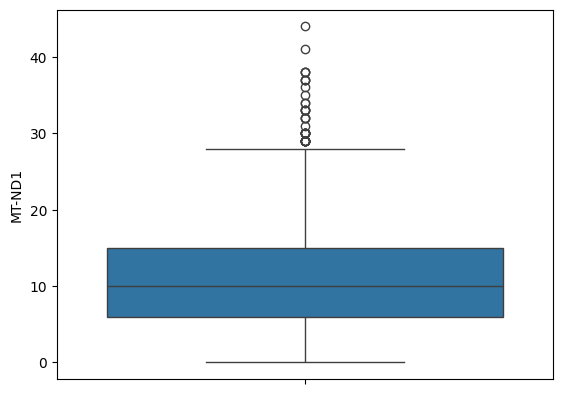

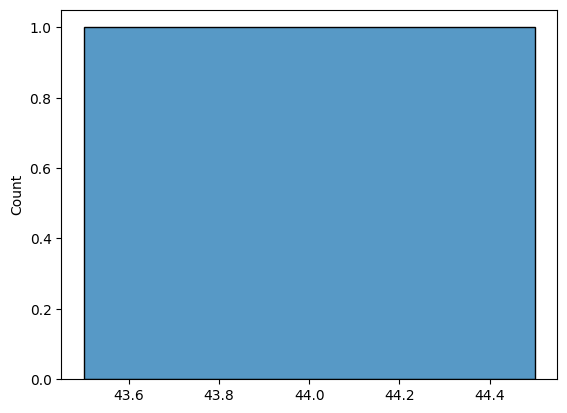

#outliers:1


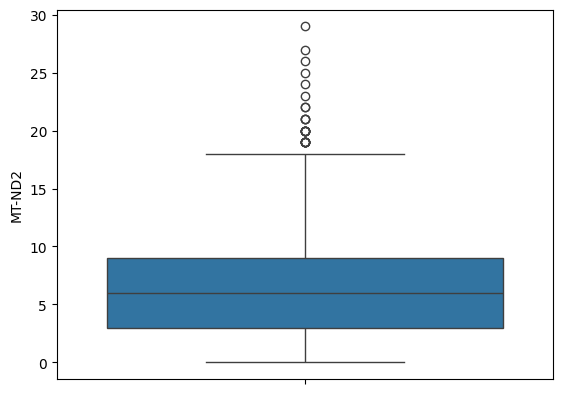

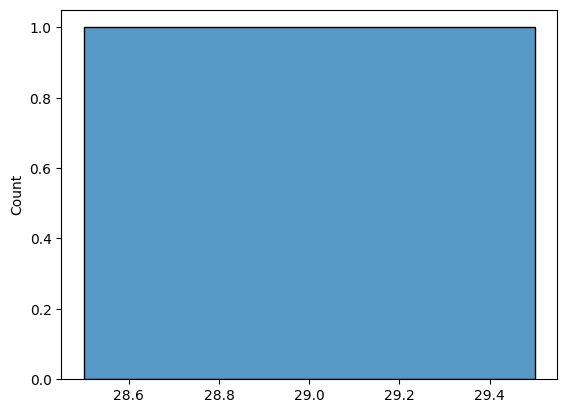

#outliers:1


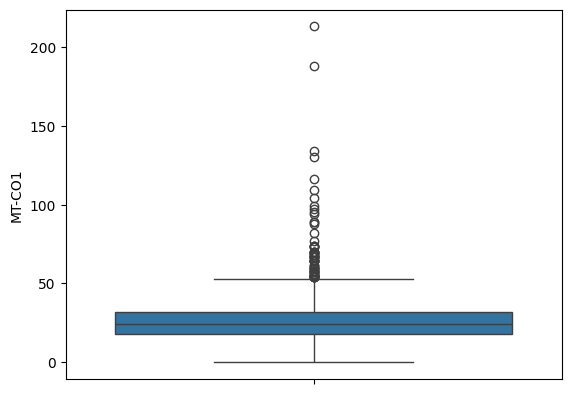

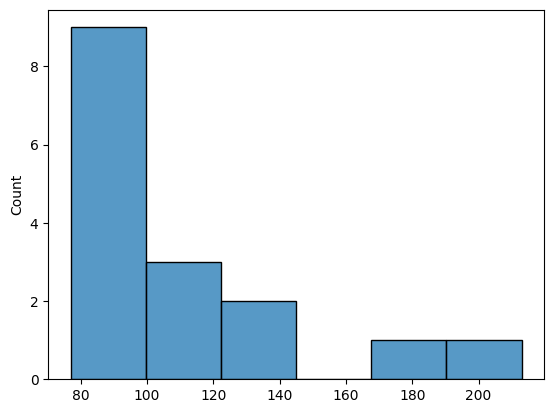

#outliers:16


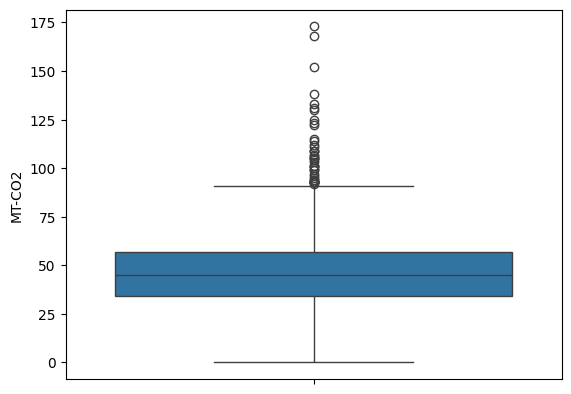

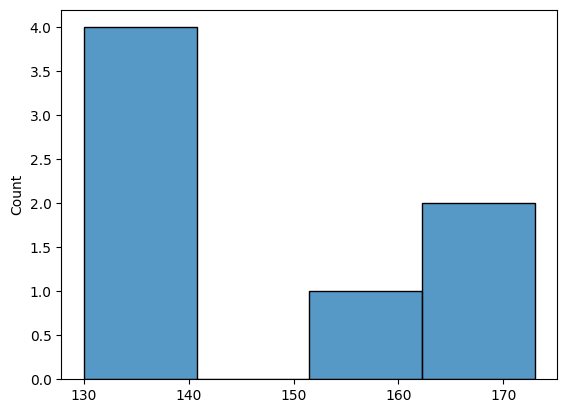

#outliers:7


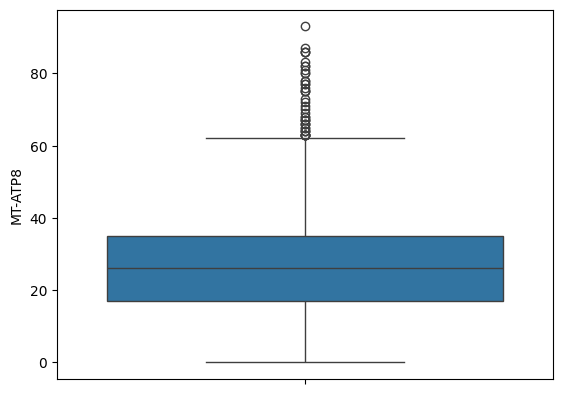

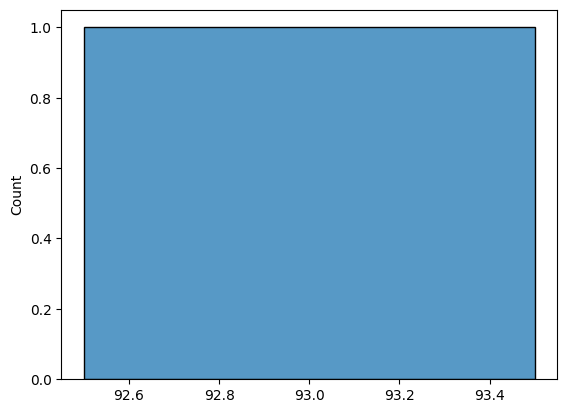

#outliers:1


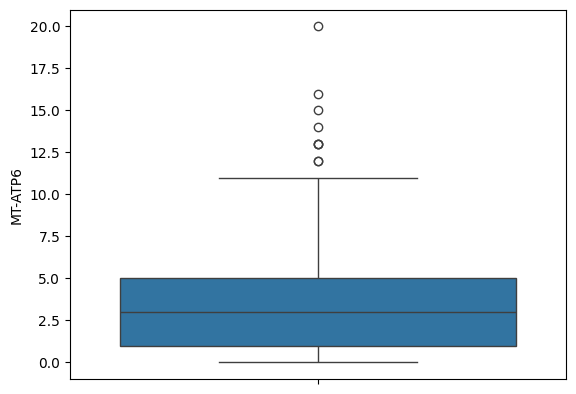

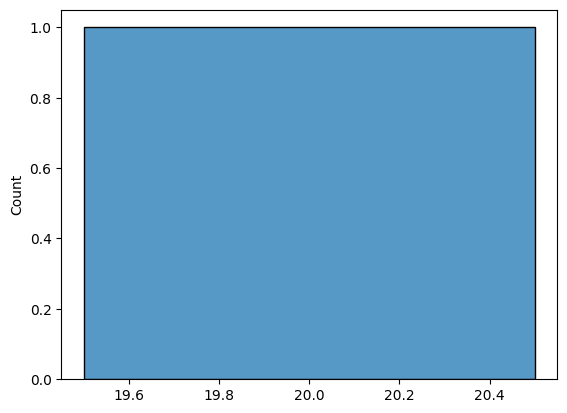

#outliers:1


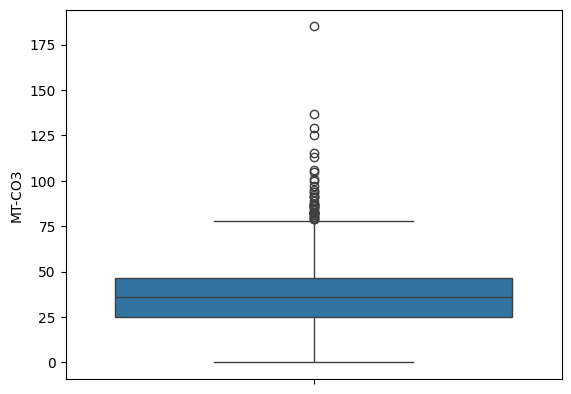

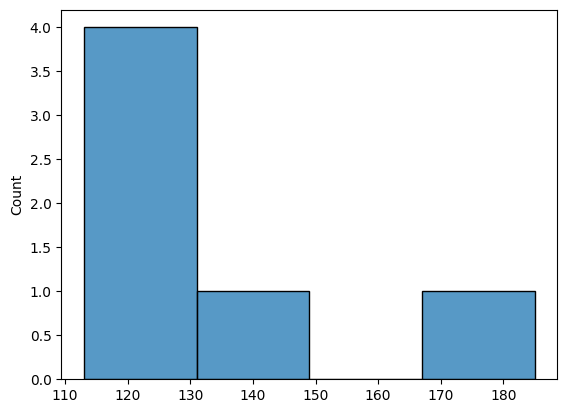

#outliers:6


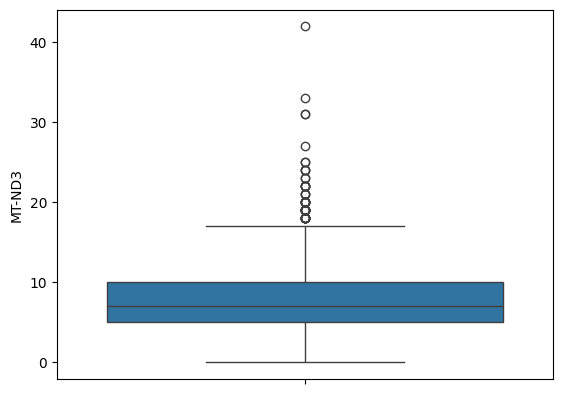

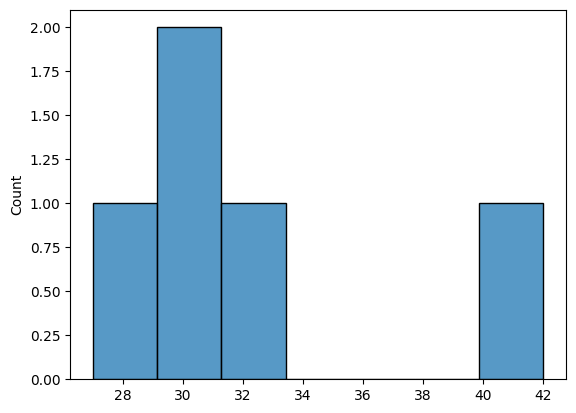

#outliers:5


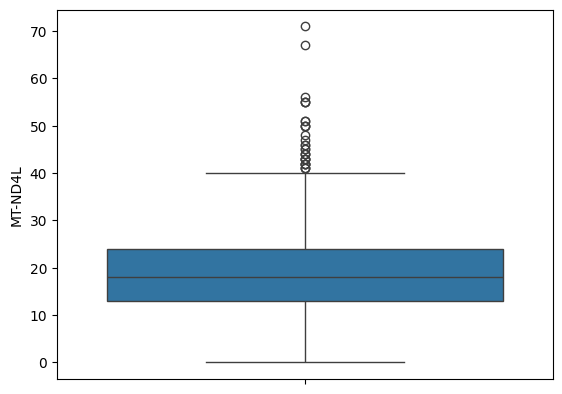

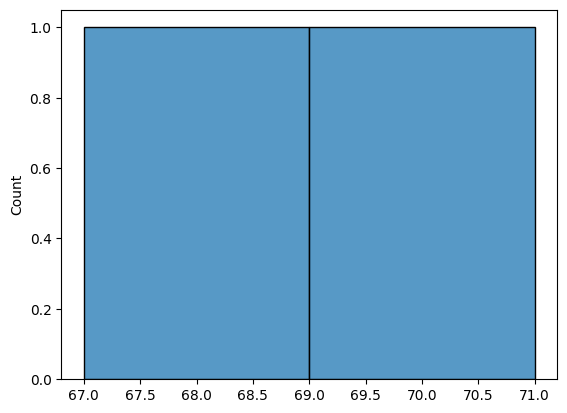

#outliers:2


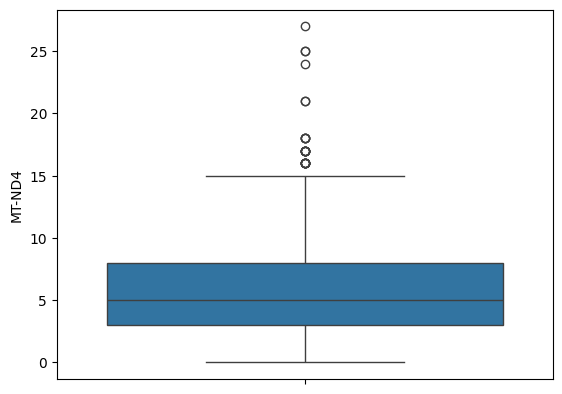

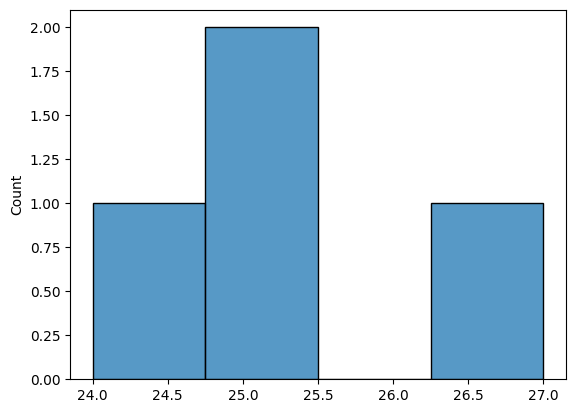

#outliers:4


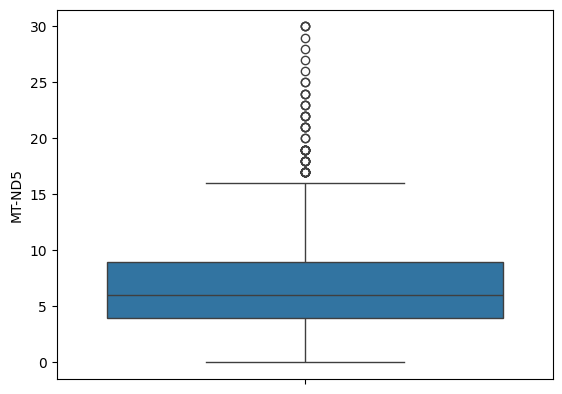

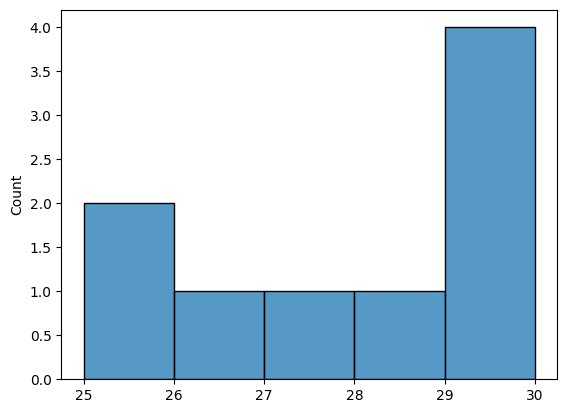

#outliers:9


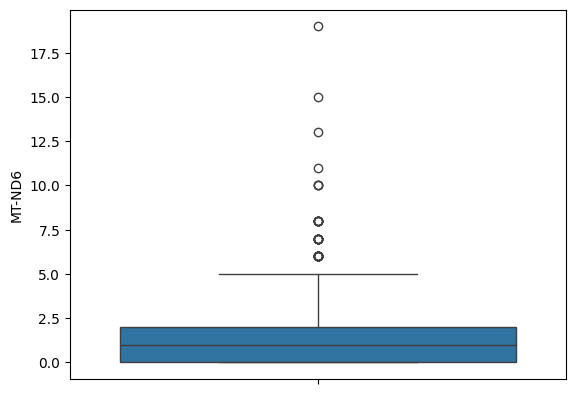

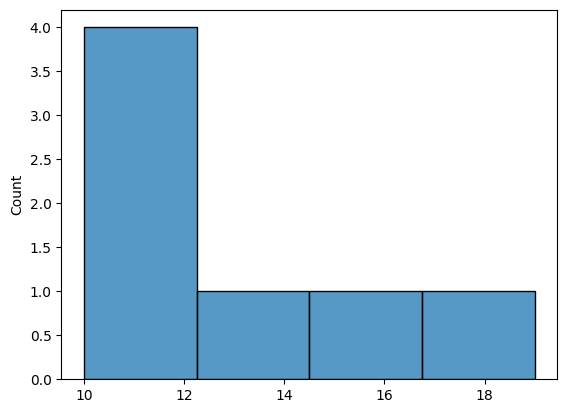

#outliers:7


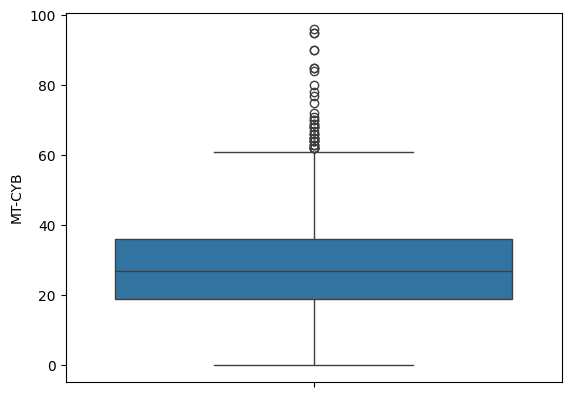

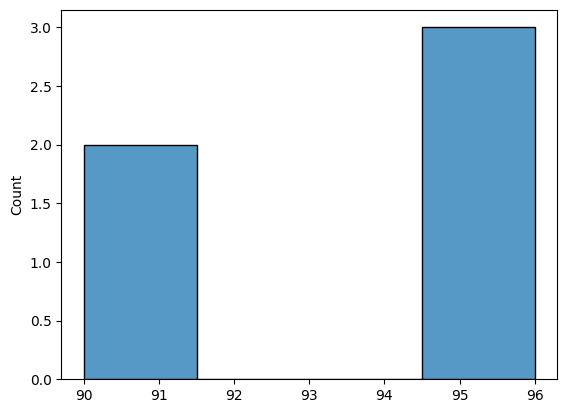

#outliers:5


In [87]:
def find_otl(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1

    outliers = []
    for n in data:
        if n > q3 + 3 * iqr or n < q1 - 3 * iqr:
            outliers.append(n)
    return outliers

def plot_outliers(df):

    df1 = df.T
    for i in range(len(df1)):
        data = df1.iloc[i]
        sns.boxplot(data)
        plt.show()

        outliers = find_otl(data)

        sns.histplot(outliers)
        plt.show()
        print(f"#outliers:{len(outliers)}")

plot_outliers(df18)

Denpendency of outliers:

/var/folders/c1/dwx649nn3230kr15mzg_vhvc0000gn/T/ipykernel_1709/3672289260.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Index', y='Frequency', data=df2, palette='viridis', gap=0.2)


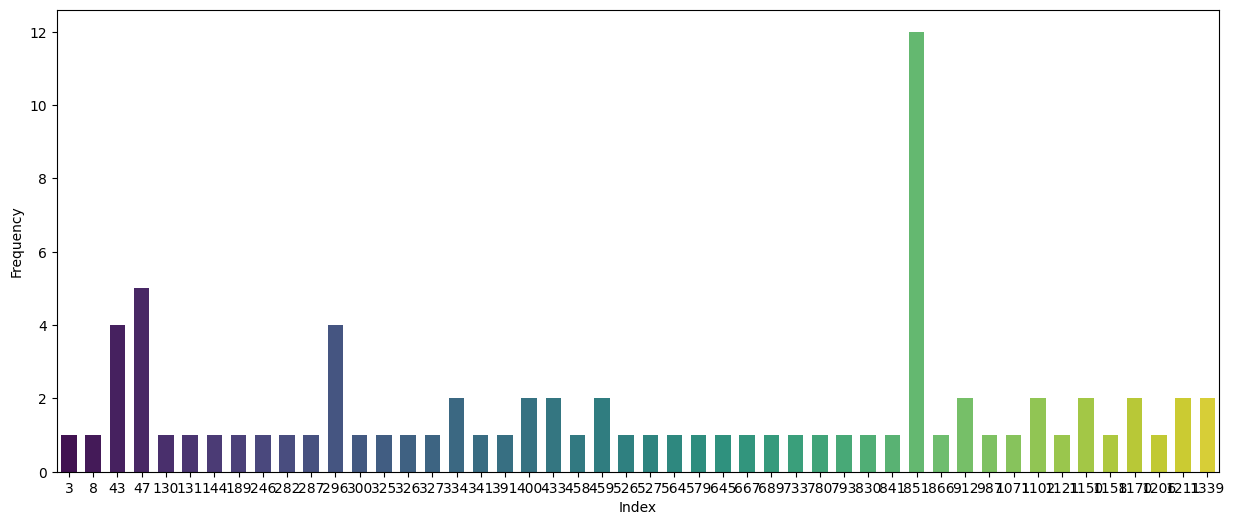

In [128]:
import collections

def find_otl_index(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1

    outliers = []
    for n in range(len(data)):
        if data[n] > q3 + 3 * iqr or data[n] < q1 - 3 * iqr:  # after many trials, 3 gives the most reasonable results
            outliers.append(n)
    return outliers

def freq_of_otl(df):
    otl_ind = []
    for i in range(len(df.columns)):
        otl_ind += find_otl_index(df.iloc[:,i])
    
    counter = collections.Counter(otl_ind)
    df2 = pd.DataFrame(counter.items(), columns=['Index', 'Frequency'])
    plt.figure(figsize=(15, 6))
    sns.barplot(x='Index', y='Frequency', data=df2, palette='viridis', gap=0.2)
    plt.show()

freq_of_otl(df28)

Remove outliers folloing the definition above:

In [129]:
def remove_otl(df):
    """
    given a df, remove outliers, i.e. n not in [q1 - 3 * iqr, q3 + 3 * iqr]
    """
    df1 = df
    otl_ind = set()
    for i in range(len(df.columns)):
        otl_ind |= set(find_otl_index(df1.iloc[:,i]))
    return df1.drop(otl_ind)

df24r = remove_otl(df24)
print(len(df24), len(df24r))

4034 3913
